### Load dependencies

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  

import netCDF4
from netCDF4 import Dataset, num2date, date2index
from datetime import datetime, timedelta

import time as tm
import numpy as np
from numpy import argmin, linspace, size, array

import cdo
from cdo import *
cdo = Cdo()

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path as mpath

import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

from shapely import geometry
from collections import namedtuple
from shapely.geometry.polygon import LinearRing

import matplotlib.patches as mpatches

import numpy.ma as ma
import pandas as pd
 
import matplotlib.cm as cm
import xarray as xr

### North Atlantic

In [2]:
def var(data):
    a = cdo.sellonlatbox('-90,-10,15,65',input=data, options='-f nc')
    a1 = cdo.setclonlatbox('0,-89,-60,50,65',input=a, options='-f nc')
    b = cdo.fldsum(input=a, options='-f nc')
    
    #Yearmean
    c1 = cdo.yearmean(input=b, options='-f nc')
    
    d=Dataset(c1,'r')
    co2_ym = d.variables['co2flux'][:,0,0]
    
    #Winter
    e = cdo.select('season=DJF', input=b, options='-f nc')
    f1= cdo.yearmean(input=e, options='-f nc')
    
    g = Dataset(f1, 'r')
    co2_win = g.variables['co2flux'][:,0,0]
    
    #Spring
    h = cdo.select('season=MAM', input=b, options='-f nc')
    i1= cdo.yearmean(input=h, options='-f nc')
    
    j = Dataset(i1, 'r')
    co2_spr = j.variables['co2flux'][:,0,0]
    
    #Summer
    k = cdo.select('season=JJA', input=b, options='-f nc')
    l1= cdo.yearmean(input=k, options='-f nc')
    
    m = Dataset(l1, 'r')
    co2_sum = m.variables['co2flux'][:,0,0]
    
    #Autumn
    o = cdo.select('season=SON', input=b, options='-f nc')
    p1 = cdo.yearmean(input=o, options='-f nc')
    
    q = Dataset(p1, 'r')
    co2_aut = q.variables['co2flux'][:,0,0]
    
    return [np.std(co2_ym),np.std(co2_win),np.std(co2_spr),np.std(co2_sum),np.std(co2_aut)]

In [3]:
variability=np.zeros((8,5))

observations=['lsce','csir','spco2','jena','jma','nies','ens','mpi']

for i in range(0,len(observations)):
    f = '{}{}{}'.format('../data/',observations[i],'_1990-2020_co2.nc')
    
    variability[i]=var(f)

In [4]:
annual_ob=[]
winter_ob=[]
spring_ob=[]
summer_ob=[]
autumn_ob=[]

for i in range(0,7):
    annual_ob.append(variability[i][0])
    winter_ob.append(variability[i][1])
    spring_ob.append(variability[i][2])
    summer_ob.append(variability[i][3])
    autumn_ob.append(variability[i][4])
    
observations=pd.DataFrame(list(zip(annual_ob, winter_ob, spring_ob, summer_ob, autumn_ob)),
                     columns =['Annual Mean', 'Winter', 'Spring', 'Summer','Autumn'])

In [5]:
variability_ge=np.zeros((100,5))
for i in range(1,101):
    f='{}{}{}'.format('../data/GE_co2_',i,'.nc')
    
    variability_ge[i-1]=var(f)
    print(str(i).zfill(3)+"/101 done", end="\r")
    
annual_ge=[]
winter_ge=[]
spring_ge=[]
summer_ge=[]
autumn_ge=[]

for i in range(0,100):
    annual_ge.append(variability_ge[i][0])
    winter_ge.append(variability_ge[i][1])
    spring_ge.append(variability_ge[i][2])
    summer_ge.append(variability_ge[i][3])
    autumn_ge.append(variability_ge[i][4])
    
members=pd.DataFrame(list(zip(annual_ge, winter_ge, spring_ge, summer_ge, autumn_ge)),
                     columns =['Annual', 'Winter', 'Spring', 'Summer','Autumn'])

<Figure size 6000x4800 with 0 Axes>

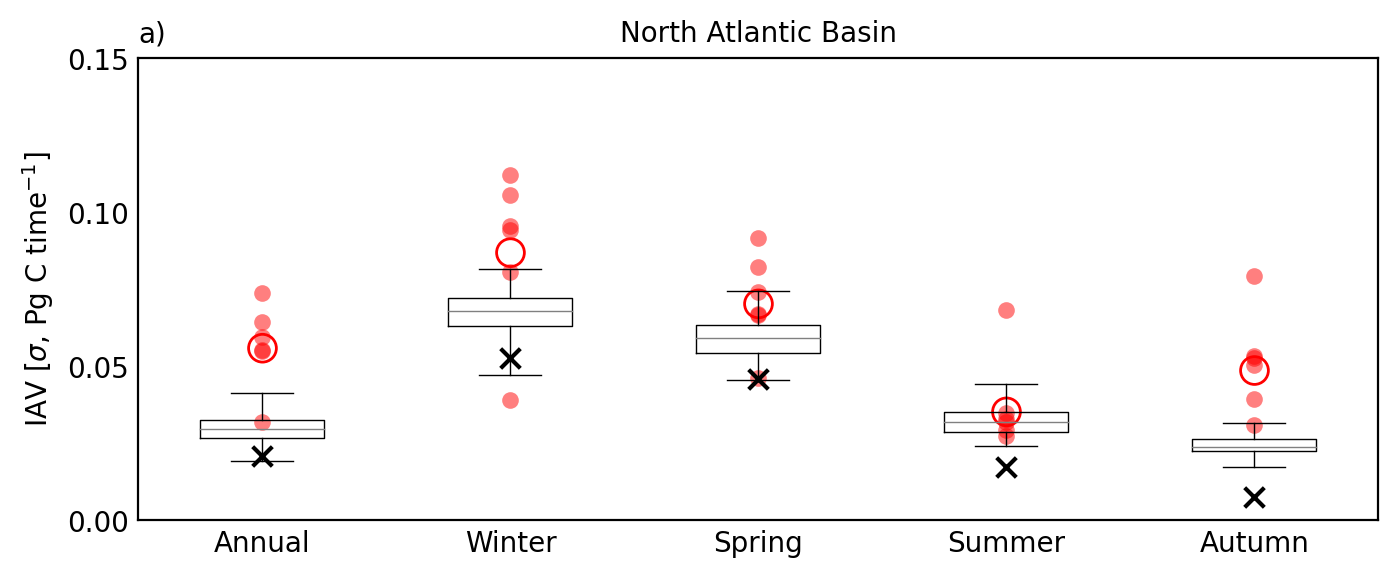

In [10]:
fig = plt.figure(figsize=(10,8),dpi=600)

box=members.plot(kind='box', color=dict(boxes='black', whiskers='black', medians='black', caps='black'),
            boxprops=dict(linestyle='-', linewidth=0.5),
            flierprops=dict(linestyle='-', linewidth=0.5),
            medianprops=dict(linestyle='-', linewidth=0.5, color='grey'),
            whiskerprops=dict(linestyle='-', linewidth=0.5),
            capprops=dict(linestyle='-', linewidth=0.5),
            showfliers=True, grid=False, rot=0, figsize=(8,3), whis=2)

for i,c in zip(range(0,len(variability)-2),colors):
    plt.scatter(1,variability[i][0],color='red', alpha=0.5, linewidth=0)#, label=str(labels[i]))  
    plt.scatter(2,variability[i][1],color='red', alpha=0.5, linewidth=0)  
    plt.scatter(3,variability[i][2],color='red', alpha=0.5, linewidth=0)  
    plt.scatter(4,variability[i][3],color='red', alpha=0.5, linewidth=0)
    plt.scatter(5,variability[i][4],color='red', alpha=0.5, linewidth=0) 
    
plt.scatter(1,variability[6][0], color='red',s=100, facecolor='None', edgecolor='red',zorder=1) #label=str(labels[6])
plt.scatter(2,variability[6][1], color='red',s=100, facecolor='None', edgecolor='red',zorder=1)
plt.scatter(3,variability[6][2], color='red',s=100, facecolor='None', edgecolor='red',zorder=1)
plt.scatter(4,variability[6][3], color='red',s=100, facecolor='None', edgecolor='red',zorder=1)
plt.scatter(5,variability[6][4], color='red',s=100, facecolor='None', edgecolor='red',zorder=1)

plt.scatter(1,variability[7][0],s=50, color="black", marker="x", zorder=1) #label=str(labels[7])
plt.scatter(2,variability[7][1],s=50, color="black", marker="x", zorder=1)
plt.scatter(3,variability[7][2],s=50, color="black", marker="x", zorder=1)
plt.scatter(4,variability[7][3],s=50, color="black", marker="x", zorder=1)
plt.scatter(5,variability[7][4],s=50, color="black", marker="x", zorder=1)

plt.ylim(0,0.15)
plt.yticks([0,0.05,0.1,0.15])

plt.ylabel('IAV [$\sigma$, Pg C time$^{-1}$]', fontsize=10)
plt.title('North Atlantic Basin', fontsize=10)
plt.title("a)", loc='left',fontsize=10)

plt.tick_params(top='off', right='off', which='both') 
plt.tick_params(axis='both', which='both', length=0)

plt.savefig('2022_Fig3Panela.png', dpi=400, bbox_inches='tight')

### Southern Ocean

In [11]:
def var(data):
    
    a = cdo.sellonlatbox('-180,180,-35,-65',input=data, options='-f nc')
    b = cdo.fldsum(input=a, options='-f nc')
    
    #Yearmean
    c1 = cdo.yearmean(input=b, options='-f nc')
    #c  = cdo.detrend(input=c1, options='-f nc')
    
    d=Dataset(c1,'r')
    co2_ym = d.variables['co2flux'][:,0,0]
    
    #Winter
    e = cdo.select('season=DJF', input=b, options='-f nc')
    f1= cdo.yearmean(input=e, options='-f nc')
    #f = cdo.detrend(input=f1,options='-f nc')
    
    g = Dataset(f1, 'r')
    co2_win = g.variables['co2flux'][:,0,0]
    
    #Spring
    h = cdo.select('season=MAM', input=b, options='-f nc')
    i1= cdo.yearmean(input=h, options='-f nc')
    #i = cdo.detrend(input=i1,options='-f nc')
    
    j = Dataset(i1, 'r')
    co2_spr = j.variables['co2flux'][:,0,0]
    
    #Summer
    k = cdo.select('season=JJA', input=b, options='-f nc')
    l1= cdo.yearmean(input=k, options='-f nc')
    #l = cdo.detrend(input=l1,options='-f nc')
    
    m = Dataset(l1, 'r')
    co2_sum = m.variables['co2flux'][:,0,0]
    
    #Autumn
    o = cdo.select('season=SON', input=b, options='-f nc')
    p1 = cdo.yearmean(input=o, options='-f nc')
    #p = cdo.detrend(input=p1,options='-f nc')
    
    q = Dataset(p1, 'r')
    co2_aut = q.variables['co2flux'][:,0,0]
    
    return [np.std(co2_ym),np.std(co2_win),np.std(co2_spr),np.std(co2_sum),np.std(co2_aut)]

In [12]:
variability=np.zeros((8,5))

observations=['lsce','csir','spco2','jena','jma','nies','ens','mpi']

for i in range(0,len(observations)):
    f = '{}{}{}'.format('../data/',observations[i],'_1990-2020_co2.nc')
    
    variability[i]=var(f)
    
annual_ob=[]
winter_ob=[]
spring_ob=[]
summer_ob=[]
autumn_ob=[]

for i in range(0,7):
    annual_ob.append(variability[i][0])
    winter_ob.append(variability[i][1])
    spring_ob.append(variability[i][2])
    summer_ob.append(variability[i][3])
    autumn_ob.append(variability[i][4])
    
observations=pd.DataFrame(list(zip(annual_ob, winter_ob, spring_ob, summer_ob, autumn_ob)),
                     columns =['Annual Mean', 'Winter', 'Spring', 'Summer','Autumn'])

In [13]:
variability_ge=np.zeros((100,5))
for i in range(1,101):
    f='{}{}{}'.format('../data/GE_co2_',i,'.nc')
    
    variability_ge[i-1]=var(f)
    print(str(i).zfill(3)+"/101 done", end="\r")
    
annual_ge=[]
winter_ge=[]
spring_ge=[]
summer_ge=[]
autumn_ge=[]

for i in range(0,100):
    annual_ge.append(variability_ge[i][0])
    winter_ge.append(variability_ge[i][1])
    spring_ge.append(variability_ge[i][2])
    summer_ge.append(variability_ge[i][3])
    autumn_ge.append(variability_ge[i][4])
    
members=pd.DataFrame(list(zip(annual_ge, winter_ge, spring_ge, summer_ge, autumn_ge)),
                     columns =['Annual', 'Winter', 'Spring', 'Summer','Autumn'])

<Figure size 6000x4800 with 0 Axes>

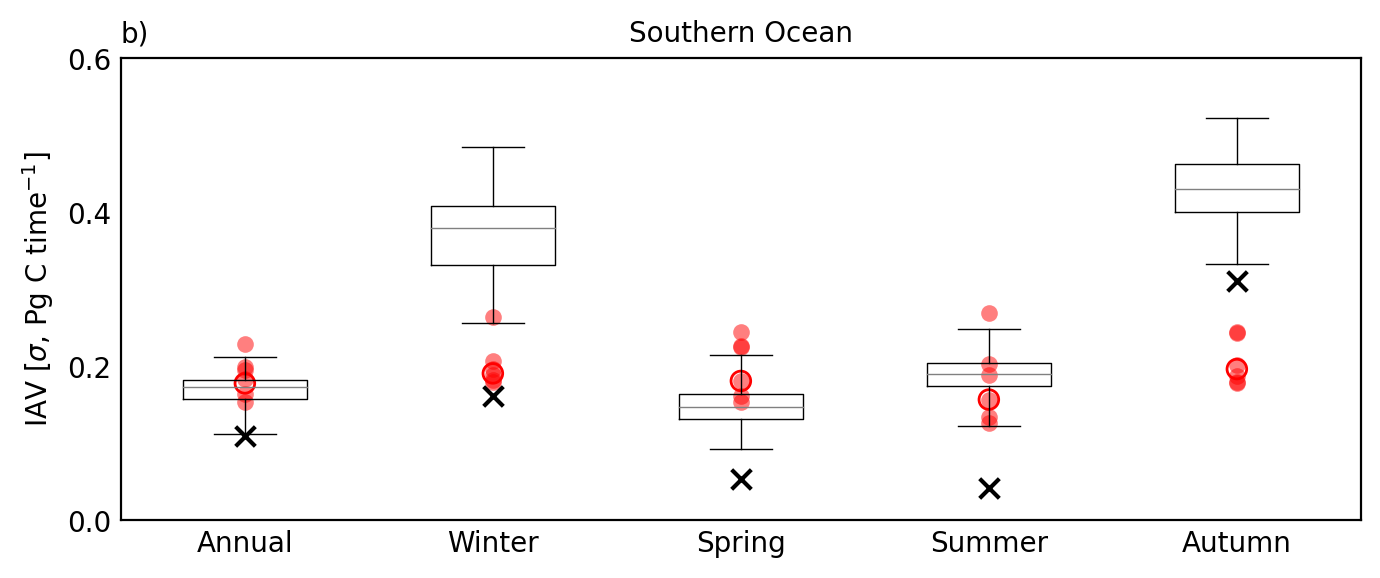

In [15]:
fig = plt.figure(figsize=(10,8),dpi=600)

box=members.plot(kind='box', color=dict(boxes='black', whiskers='black', medians='black', caps='black'),
            boxprops=dict(linestyle='-', linewidth=0.5),
            flierprops=dict(linestyle='-', linewidth=0.5),
            medianprops=dict(linestyle='-', linewidth=0.5, color='grey'),
            whiskerprops=dict(linestyle='-', linewidth=0.5),
            capprops=dict(linestyle='-', linewidth=0.5),
            showfliers=True, grid=False, rot=0, figsize=(8,3), whis=2)

#colors = ['#4F008F','#246BFF','#33E4FF','#00A380',"#74FB84", "#F2BC40"]
for i,c in zip(range(0,len(variability)-2),colors):
    plt.scatter(1,variability[i][0],color='red', alpha=0.5, linewidth=0)#, label=str(labels[i]))  
    plt.scatter(2,variability[i][1],color='red', alpha=0.5, linewidth=0)  
    plt.scatter(3,variability[i][2],color='red', alpha=0.5, linewidth=0)  
    plt.scatter(4,variability[i][3],color='red', alpha=0.5, linewidth=0)
    plt.scatter(5,variability[i][4],color='red', alpha=0.5, linewidth=0) 
    
plt.scatter(1,variability[6][0], color='red',s=50, facecolor='None', edgecolor='red',zorder=1) #label=str(labels[6])
plt.scatter(2,variability[6][1], color='red',s=50, facecolor='None', edgecolor='red',zorder=1)
plt.scatter(3,variability[6][2], color='red',s=50, facecolor='None', edgecolor='red',zorder=1)
plt.scatter(4,variability[6][3], color='red',s=50, facecolor='None', edgecolor='red',zorder=1)
plt.scatter(5,variability[6][4], color='red',s=50, facecolor='None', edgecolor='red',zorder=1)

plt.scatter(1,variability[7][0],s=50, color="black", marker="x", zorder=1) #label=str(labels[7])
plt.scatter(2,variability[7][1],s=50, color="black", marker="x", zorder=1)
plt.scatter(3,variability[7][2],s=50, color="black", marker="x", zorder=1)
plt.scatter(4,variability[7][3],s=50, color="black", marker="x", zorder=1)
plt.scatter(5,variability[7][4],s=50, color="black", marker="x", zorder=1)

#plt.ylim(0,0.15)
plt.yticks([0,0.2,0.4,0.6])

plt.ylabel('IAV [$\sigma$, Pg C time$^{-1}$]', fontsize=10)
plt.title('Southern Ocean', fontsize=10)
plt.title("b)", loc='left',fontsize=10)

plt.tick_params(top='off', right='off', which='both') 
plt.tick_params(axis='both', which='both', length=0)

plt.savefig('2022_Fig3Panelb.png', dpi=400, bbox_inches='tight')